In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/apple/Downloads/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

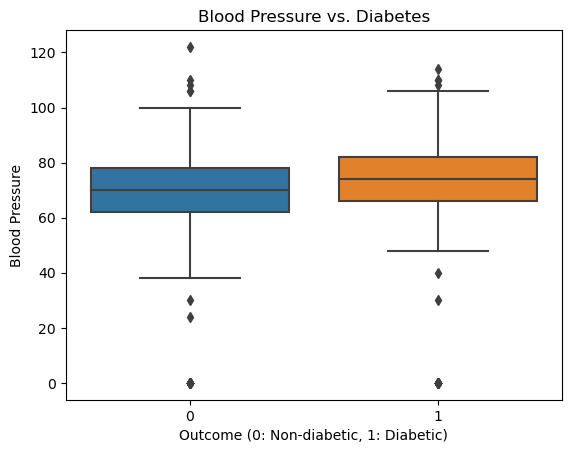

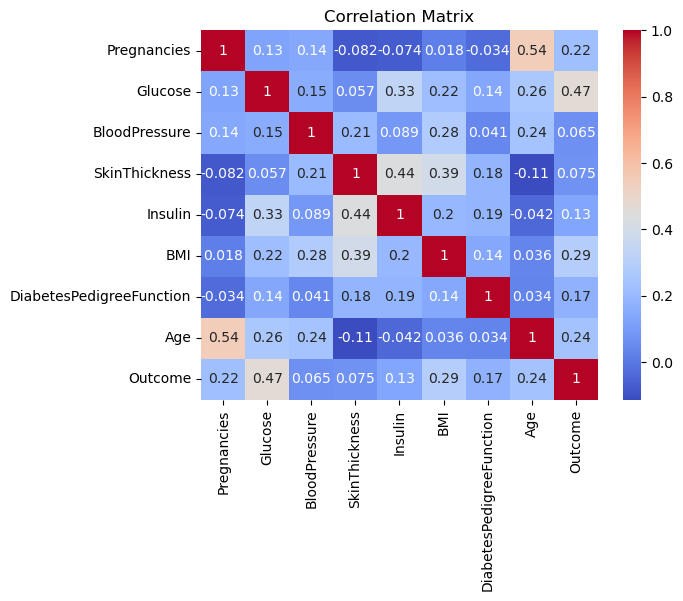

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# Box plot of BloodPressure for diabetic and non-diabetic individuals
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Blood Pressure vs. Diabetes')
plt.xlabel('Outcome (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Blood Pressure')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
def correlation(df , threshold):
    
    sets = set()
    
    corr = df.corr()
    
    for i in range(df.shape[1]):
        for j in range(i):
            if abs(corr.iloc[i , j]) > threshold:
                columns = corr.columns[i]
                
                sets.add(columns)
                
    return sets
                

In [10]:
correlation(df , 0.5)

{'Age'}

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2236/3219186657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Outcome'] == 0]['Age'])
/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2236/3219186657.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Outc

<Axes: xlabel='Age', ylabel='Density'>

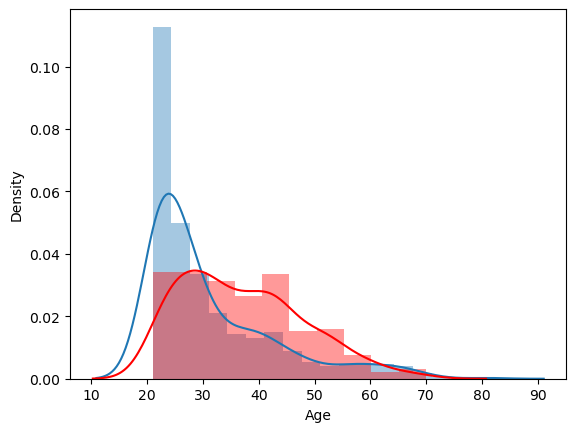

In [12]:
sns.distplot(df[df['Outcome'] == 0]['Age'])
sns.distplot(df[df['Outcome'] == 1]['Age'] ,color = 'r')

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2236/1362156704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Outcome'] == 0]['BloodPressure'])
/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_2236/1362156704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

<Axes: xlabel='BloodPressure', ylabel='Density'>

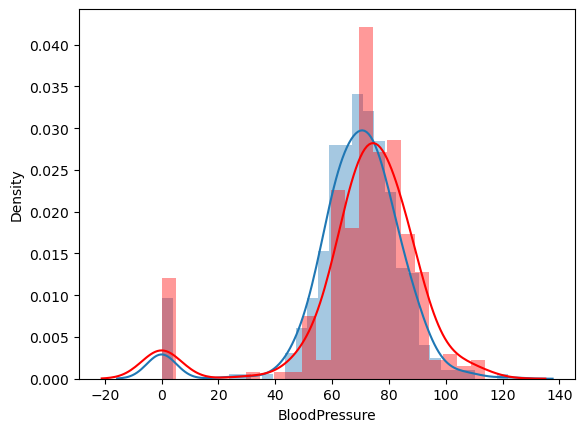

In [32]:
sns.distplot(df[df['Outcome'] == 0]['BloodPressure'])
sns.distplot(df[df['Outcome'] == 1]['BloodPressure'] ,color = 'r')

In [13]:
# sns.pairplot(df , hue ='Outcome')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [16]:
X_train ,X_test , y_train ,y_test = train_test_split(df.drop('Outcome',axis = 1),df.iloc[:,-1] ,test_size = 0.2)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [18]:
def algorithms(X_train , X_test , y_train , y_test):
    dt = DecisionTreeClassifier()  
    lg    = LogisticRegression()
    knn = KNeighborsClassifier()
    dt   = DecisionTreeClassifier()
    random = RandomForestClassifier(n_estimators = 50)
    clf = { 'random':random,
             'lg':lg,
             'knn':knn,
             'dt':dt}
    
    for i , j in clf.items():
        j.fit(X_train ,y_train)
        predict = j.predict(X_test)
        print(i ,accuracy_score(y_test , predict))
        

In [19]:
algorithms(X_train , X_test , y_train , y_test)

random 0.7792207792207793
lg 0.7922077922077922
knn 0.7337662337662337
dt 0.7142857142857143


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
lg =  LogisticRegression()

In [22]:
lg.fit(X_train , y_train)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
prediction = lg.predict(X_test)

In [24]:
input_data = (5,166,72,19,175,25.8,0.587,51)

In [25]:
X_test_value = X_test.values


In [26]:
reshape = X_test_value[99].reshape(1,8)

In [27]:
reshape.shape

(1, 8)

In [28]:
lg.predict(reshape)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [29]:
 X_test_value[99].reshape(1,8)

array([[  2.   , 155.   ,  74.   ,  17.   ,  96.   ,  26.6  ,   0.433,
         27.   ]])

In [30]:
lg.predict(np.array([[ 1.   , 80.   , 74.   , 11.   , 60.   , 30.   ,  0.527, 22.   ]]))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [31]:
 X_test_value[99]

array([  2.   , 155.   ,  74.   ,  17.   ,  96.   ,  26.6  ,   0.433,
        27.   ])